# Linear Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
x = 2 * np.random.rand(100,1) # data
y = 4 + 3 * x + np.random.randn(len(x),1) # label
print(x.shape)
print(y.shape)

(100, 1)
(100, 1)


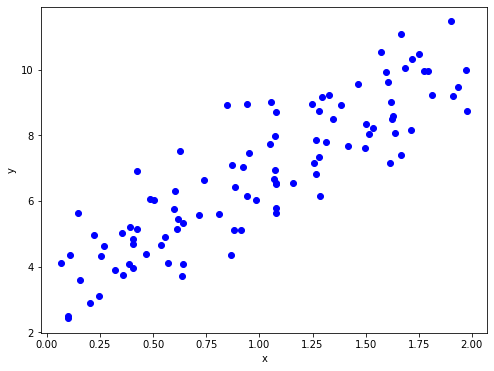

In [21]:
fig = plt.figure(figsize=(8,6))
plt.plot(x,y,'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [33]:
x_b = np.c_[np.ones((len(x),1)),x]
weights = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
weights

array([[3.33133229],
       [3.49403833]])

In [30]:
x_test =np.array([[0],[1.0],[2.0]])
x_test_b = np.c_[np.ones((len(x_test),1)),x_test]
y_predict = x_test_b.dot(weights)
y_predict

array([[ 3.33133229],
       [ 6.82537062],
       [10.31940895]])

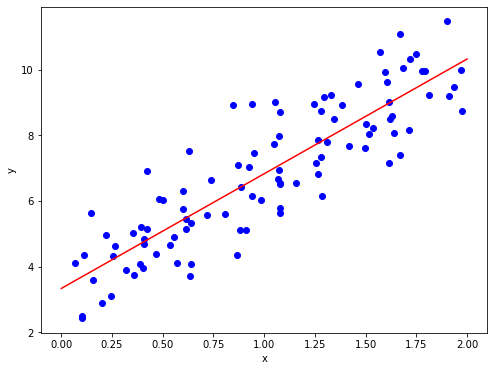

In [31]:
fig = plt.figure(figsize=(8,6))
plt.plot(x,y,'bo')
plt.plot(x_test,y_predict,'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


 # Linear Regression Scikit Learn

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# training
model.fit(x,y)
model.intercept_, model.coef_

(array([3.33133229]), array([[3.49403833]]))

In [36]:
# prediction
y_predict = model.predict(x_test)
y_predict

array([[ 3.33133229],
       [ 6.82537062],
       [10.31940895]])

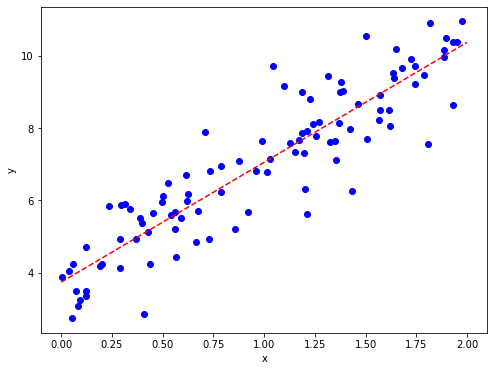

In [44]:
fig = plt.figure(figsize=(8,6))
plt.plot(x,y,'bo')
plt.plot(x_test,y_predict,'r--')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Gradient Descent Algorithms

In [39]:
def gradientDescent(x,y,learningrate=0.1,iterations=500):
    m = len(x)
    weights = np.random.randn(x.shape[1],1)
    for iter in range(iterations):
        pred = np.dot(x,weights)
        weights = weights - (1/m)*learningrate*(x.T.dot(pred-y))
    return weights

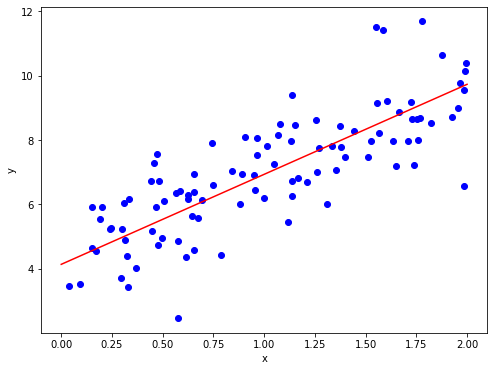

In [50]:
x = 2 * np.random.rand(100,1) # data
y = 4 + 3 * x + np.random.randn(len(x),1) # label
x_b = np.c_[np.ones((len(x),1)),x]
weights = gradientDescent(x_b,y,0.1,1000)
# predicting
x_test =np.array([[0],[1.0],[2.0]])
x_test_b = np.c_[np.ones((len(x_test),1)),x_test]
y_predict = x_test_b.dot(weights)

fig = plt.figure(figsize=(8,6))
plt.plot(x,y,'bo')
plt.plot(x_test,y_predict,'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Stochastic Gradient Descent

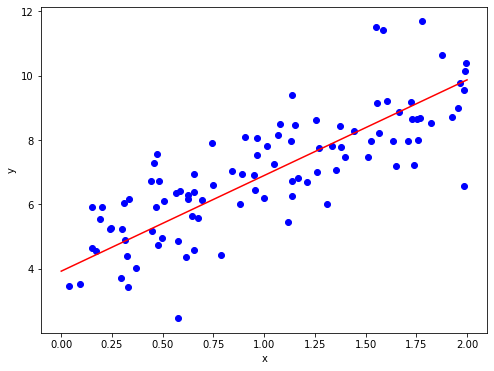

In [59]:
from sklearn.linear_model import SGDRegressor
model_SGD = SGDRegressor(max_iter=500, tol= 1e-3,eta0=0.01) 
model_SGD.fit(x,y.ravel())
model_SGD.intercept_, model_SGD.coef_

# prediction
y_predict = model_SGD.predict(x_test)
y_predict

fig = plt.figure(figsize=(8,6))
plt.plot(x,y,'bo')
plt.plot(x_test,y_predict,'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [81]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=True)
x_poly  = poly_features.fit_transform(x)
x_poly[0],x[0]

lin_reg = LinearRegression()
lin_reg.fit(x_poly,y)
x_test  = np.linspace(-3,3,100).reshape(100,1)
x_test_trasform = poly_features.transform(x_test)
y_poly_pred = lin_reg.predict(x_test_trasform)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.        , 0.93366893, 0.56456263]]))

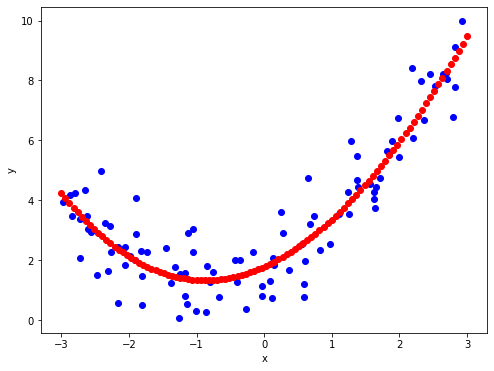

In [78]:
np.random.seed(42)
x = 6* np.random.rand(100,1)-3 # data
y = 0.5 * x**2 + x +2 + np.random.randn(len(x),1) # label

fig = plt.figure(figsize=(8,6))
plt.plot(x,y,'bo')
plt.plot(x_test,y_poly_pred,'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.show()